In [1]:
%config InlineBackend.figure_format = 'retina'

from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.font_manager as font_manager
import matplotlib as mpl
import matplotlib.patches as mp
import seaborn as sns

# 设置全局字体
font_dirs = ['/public/home/mowp/test/fonts/']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 12
plt.rcParams['svg.fonttype'] = 'none'

In [3]:
import re
import sys
sys.path.append('/public1/mowp/workspace/nanopore_modification/scripts/')

%load_ext autoreload
%autoreload 1
%aimport single_read_plot

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# load data

In [738]:
infiles = {
    'wt1029':[
        '/data/Zhaijx/mowp/data/stam_seq_col_CEN/20221029_col_m6A/6ma_results/20221029_col_m6A.6mA_genome_pos.tsv.gz',
        '/data/Zhaijx/mowp/data/stam_seq_col_CEN/20221029_col_m6A/5mc_results/20221029_col_m6A.5mC_genome_pos.tsv.gz',]
}

In [739]:
bamfiles = {
    'wt1029': '/data/Zhaijx/mowp/data/stam_seq_col_CEN/20221029_col_m6A/aligned_data/20221029_col_m6A.sorted.q2.bam',
}

# Tel

In [892]:
pos = 'Chr5:0-8000'

m = re.match(r'(.*):(.*)-(.*)', pos)
chrom = m.group(1)
start = int(m.group(2).replace(',', ''))
end = int(m.group(3).replace(',', ''))

In [893]:
name = 'wt1029'
read_set = single_read_plot.preprocessing(infiles[name],  (0, 1), chrom, start, end, bam=bamfiles[name])
len(read_set)

340

In [896]:
read_plot = single_read_plot.Single_Read(chrom, start, end)

tel_bed = '/data/Zhaijx/mowp/db/col-CEN/bed/tel_region.bed.gz'
gene_bed = '/data/Zhaijx/mowp/db/col-CEN/bed/gene.sorted.bed.gz'
read_plot.add_gene_model(
    tel_bed, gene_bed, arrow=False, annotation_pos=None, small_arrow=True, y_space=5, track_height=1.8, gene_color='k')

bw_track_height = 1.2
read_width = 1
fully_span = False
left_span=False
right_span=True
start_before = 3289
mod_track_height = 6
stranded = False
expand = 0
add_bigwig = False


read_plot.add_mod_results(
    infiles[name][0],
    read_set = read_set,
    fully_span=fully_span, left_span=left_span, right_span=right_span, stranded=stranded, read_width=read_width,
    start_before=start_before,
    methylated_color='#52af4c', 
    add_bigwig=add_bigwig, bw_color='#52af4c', data_range=(0, 1), bw_track_height=bw_track_height,
    mod_track_height=mod_track_height, expand=expand)
    
read_plot.add_mod_results(
    infiles[name][1].replace('5mC', 'CG'),
    read_set = read_set,
    fully_span=fully_span, left_span=left_span, right_span=right_span, stranded=stranded, read_width=read_width,
    start_before=start_before,
    methylated_color='#104e8b', 
    add_bigwig=add_bigwig, bw_color='#104e8b', data_range=(0, 1), bw_track_height=bw_track_height,  
    mod_track_height=mod_track_height, expand=expand)

read_plot.add_mod_results(
    infiles[name][1].replace('5mC', 'CHG'),
    read_set = read_set,
    fully_span=fully_span, left_span=left_span, right_span=right_span, stranded=stranded, read_width=read_width,
    start_before=start_before,
    methylated_color='#1e7cff', 
    add_bigwig=add_bigwig, bw_color='#1e7cff', data_range=(0, 1), bw_track_height=bw_track_height,  
    mod_track_height=mod_track_height, expand=expand)

read_plot.add_mod_results(
    infiles[name][1].replace('5mC', 'CHH'),
    read_set = read_set,
    fully_span=fully_span, left_span=left_span, right_span=right_span, stranded=stranded, read_width=read_width,
    start_before=start_before,
    methylated_color='#03c4ff', 
    add_bigwig=add_bigwig, bw_color='#03c4ff', data_range=(0, 1), bw_track_height=bw_track_height,  
    mod_track_height=mod_track_height, expand=expand)

# read_plot.cluster_reads()
# read_plot.sorted_reads(by=1, ascending=False)

read_plot.summary()

Chr5:0-8000
length: 8000
mod_tracks: mod_1, mod_2, mod_3, mod_4
bw_tracks: 


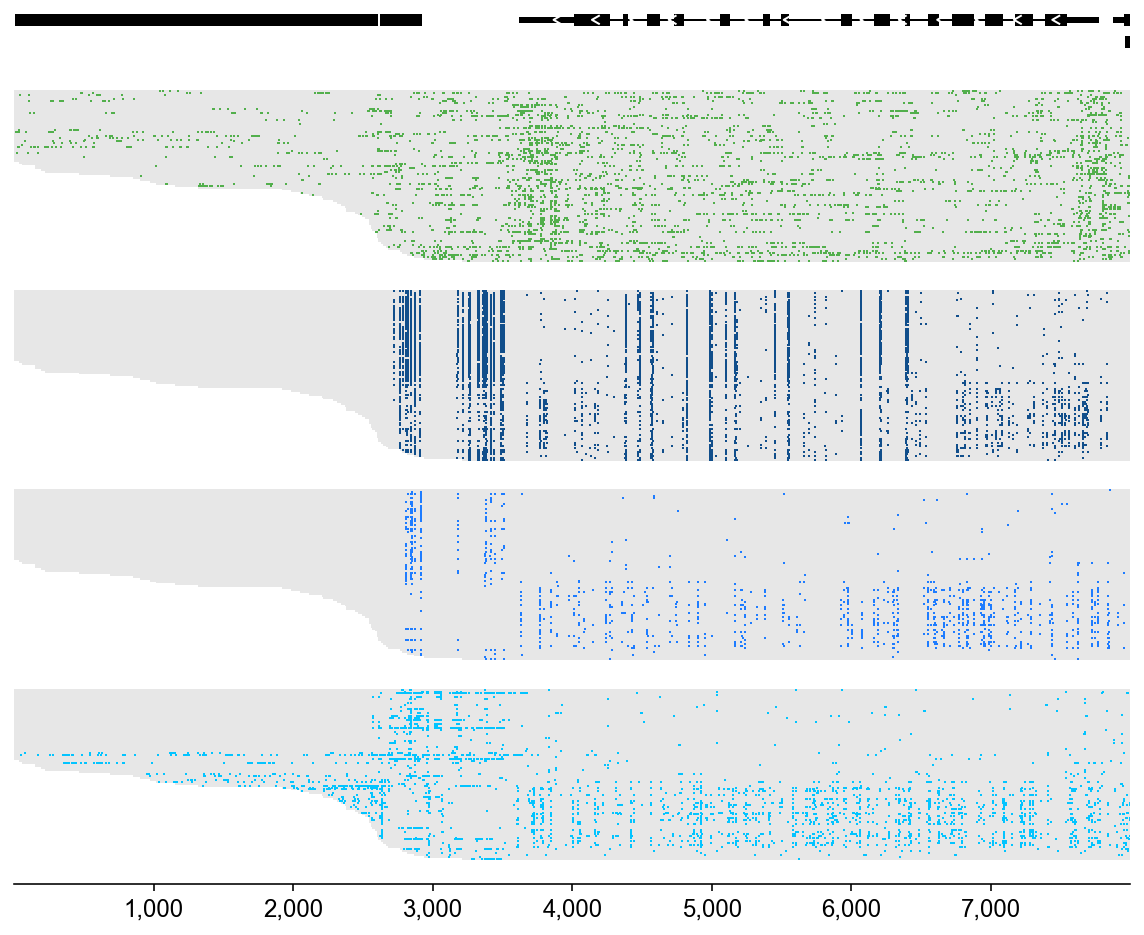

In [897]:
read_plot.plot(
    figsize=(10, 8), hspace=.1, xticks=True, subsample=0,
    # mod_tracks_set={0, 1, 2, 3}, bw_tracks_set={0, 1, 2, 3},
    # plot_order=('plot_gene_model', 'plot_bw', 'plot_mod')
    );

plt.savefig('single_read_plot.svg')